In [20]:
# Import Dependencies
import pandas as pd
from pathlib import Path

In [21]:
# Data Loading
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [22]:
# List dataframe data types
crypto_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [23]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the `IsTrading` column from the dataframe.
df = crypto_df.drop(columns=["IsTrading"])
df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [24]:
# Remove all rows that have at least one null value.
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")



Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 508 null values
Column TotalCoinSupply has 0 null values


In [25]:
df.dropna()


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [26]:
# Filter for cryptocurrencies that have been mined. 
# That is, the total coins mined should be greater than zero.
df_mined = df[df['TotalCoinsMined']>0]
df_mined

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [27]:
# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe.
df3 = df_mined.drop("CoinName", axis=1)
df3

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000
XBC,Scrypt,PoS,1.283270e+05,1000000


In [28]:
# Convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. 
# To accomplish this task, use Pandas to create dummy variables. 
# Examine the number of rows and columns of your dataset now. How did they change?
df_dummies = pd.get_dummies(df3, columns=["Algorithm","ProofType"])
df_dummies                            

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XBC,1.283270e+05,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Standardize your dataset so that columns that contain larger values 
# do not unduly influence the outcome.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies)
scaled_data

array([[-0.11450078, -0.15072489, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.09041991, -0.14255828, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [ 0.55369883,  4.67185916, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       ...,
       [-0.11433426, -0.15040252, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11449785, -0.15070954, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11401032, -0.14918981, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667]])

In [31]:
from sklearn.decomposition import PCA

# Initialize PCA model for 0.9 principal components
pca = PCA(n_components=0.9)

pca2 = pca.fit_transform(scaled_data)

# Fetch the explained variance
pca.explained_variance_ratio_


array([0.02708105, 0.02067072, 0.01990277, 0.01983637, 0.01983636,
       0.01983636, 0.01983636, 0.01981545, 0.01793603, 0.01699956,
       0.01685121, 0.015789  , 0.01503468, 0.01428098, 0.01398908,
       0.01370283, 0.0120177 , 0.0116892 , 0.01068992, 0.01038572,
       0.01017478, 0.01011304, 0.01010378, 0.0100661 , 0.0100465 ,
       0.01003429, 0.01000455, 0.00998757, 0.00998672, 0.00998093,
       0.00997749, 0.00997116, 0.00997011, 0.00997011, 0.00996863,
       0.00995964, 0.00995322, 0.00994947, 0.00994517, 0.00994236,
       0.00993881, 0.00993566, 0.00993543, 0.00993543, 0.00993543,
       0.0099346 , 0.00993005, 0.00992887, 0.00992531, 0.00991925,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991

In [33]:
df_pca = pd.DataFrame(pca2)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-0.325873,1.139894,-0.558793,0.001330,1.508333e-14,3.326965e-14,6.711732e-15,-0.013586,-1.228595,-0.061216,...,-1.717430e-15,7.022099e-16,2.870391e-15,-1.437865e-15,2.733534e-15,3.600269e-16,3.083667e-15,5.565346e-16,3.997995e-15,1.661482e-15
1,-0.308532,1.140123,-0.559208,0.001318,1.519951e-14,3.294021e-14,7.030103e-15,-0.014233,-1.231987,-0.064990,...,-1.570449e-15,2.835571e-16,2.967808e-15,-1.507157e-15,3.000334e-15,5.499133e-16,2.996437e-15,2.809070e-16,3.460230e-15,1.919772e-15
2,2.420490,1.717799,-0.635946,0.004728,1.914964e-14,5.551837e-14,1.586494e-14,-0.064570,-1.575150,-0.732407,...,6.426238e-14,-9.911724e-15,-8.323924e-14,5.111028e-14,-3.400732e-14,5.475002e-17,-6.535332e-14,-5.606626e-14,-8.280142e-14,-1.473493e-14
3,-0.138908,-1.349133,0.166846,-0.001204,-5.939156e-15,-1.315863e-14,-5.902073e-15,0.001798,0.181201,0.226610,...,9.055548e-15,1.149066e-15,-1.435982e-14,1.556709e-14,1.410250e-15,-1.120554e-14,-7.937861e-16,-7.791936e-15,-1.260850e-14,4.539098e-15
4,-0.135897,-2.110498,0.357371,-0.001688,-1.028663e-14,-2.186744e-14,-7.216773e-15,0.033395,0.359324,0.193160,...,3.729624e-14,5.928250e-14,-4.828303e-14,5.715377e-14,8.417760e-14,-9.600551e-14,1.676288e-13,4.271508e-14,-2.993969e-14,5.509103e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.323844,1.139786,-0.558823,0.001332,1.513684e-14,3.296248e-14,6.887882e-15,-0.013613,-1.229063,-0.061712,...,-1.666799e-15,2.999967e-16,2.864433e-15,-2.172074e-15,2.574669e-15,6.821183e-16,2.904178e-15,7.884362e-16,3.715206e-15,2.001936e-15
573,0.323033,-2.354008,0.374493,-0.001278,-1.080116e-14,-2.540425e-14,-7.082518e-15,0.022914,-0.030530,0.042516,...,1.980260e-14,3.605854e-14,-6.487857e-15,3.652926e-14,2.232467e-14,-5.150420e-14,4.651196e-14,-3.710740e-16,-2.473096e-14,6.241469e-15
574,-0.150690,-2.076767,0.380761,-0.001709,-9.704381e-15,-2.655837e-14,-4.697898e-15,0.035645,0.476849,0.258569,...,-1.170926e-15,1.731903e-15,1.649738e-16,-1.939177e-15,8.208683e-16,-9.973652e-16,1.182970e-15,-1.143999e-15,1.992771e-15,7.398612e-17
575,-0.279989,0.792129,-0.256736,0.000479,6.844092e-15,1.608930e-14,4.907084e-15,-0.024881,0.962765,-0.736184,...,1.039872e-15,1.017273e-15,4.697538e-15,4.211795e-15,-1.710233e-15,-1.423053e-15,9.942861e-16,4.468633e-15,1.992332e-15,3.078989e-16


In [34]:
# TSNE
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)

In [35]:
tsne_features = tsne.fit_transform(df_pca)

In [36]:
tsne_features.shape

(577, 2)

In [37]:
# Prepare to plot the dataset

# The first column of transformed features
df_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_pca['y'] = tsne_features[:,1]

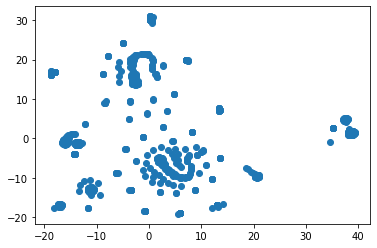

In [39]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.scatter(df_pca['x'], df_pca['y'])
plt.show()

c:\Users\foh01\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


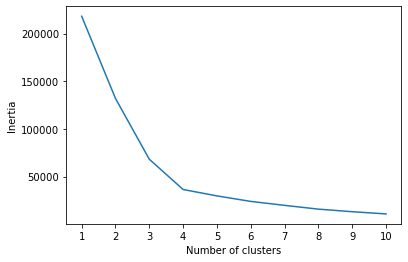

In [41]:
# K-Means
from sklearn.cluster import KMeans

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()